<a href="https://colab.research.google.com/github/donajac/Computer_Vision_Projects/blob/Face_Recognition_FisherFacesApproach/Fisher_Faces_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by:
DONA JACOB -
B170280EC

In [ ]:
FISHERFACES IMPLEMENTATION
DONA JACOB
B170280EC

In [ ]:
#upload folder in compressed form(as .zip)
from google.colab import files
uploaded=files.upload()

Saving yalefaces.zip to yalefaces (1).zip


                  ABSTRACT:

Face recognition is the process of identifying one or more people in images or videos by analyzing and comparing patterns. Algorithms for face recognition typically extract facial features and compare them to a database to find the best match.In this report I have described a face recognition algorithm which is insensitive to large variation in lighting direction and facial expression.The Eigenface technique, another method based on linearly projecting the image space to a low dimensional subspace, has similar computational requirements.But extensive research that has taken place in this field has showed that fisherface implementation has lower error rates than eigenfaces implementation


In [ ]:
!unzip yalefaces

In [ ]:
%rm ./yalefaces/subject01.gif

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
#from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline

In [ ]:
def get_images():

 # Recursively gets all the images inside yalefaces folder.

 # Returns column vectors of images with dim 15*11*50*50.

  image_paths_class = []
  for i in range(1,16,1): # 15 classes
    if i<10:
      image_paths_class.append(glob.glob("./yalefaces/subject0{}*".format(i)))
    else:
      image_paths_class.append(glob.glob("./yalefaces/subject{}*".format(i)))

  clslst = []
  for i in image_paths_class:
    lst = []
    for j in i:
      image = mpimg.imread(r'{}'.format(j))
      #Each image is a 2D matrix of order 240x320
      resized_image = cv2.resize(image,(50,50))
      #reduce size to 50x50 for ease of computation
      lst.append(resized_image)
    lst = np.array(lst)
    clslst.append(lst)
  grouped_images = np.array(clslst)

  return grouped_images


In [ ]:
def display_images(images,rand=False):
 '''
 Randomly selects 6 images and displays it if rand=True.
 Else displays first 6 images.
 '''
 if rand==True:
  rand_index = np.random.randint(len(images),size=6)
 else:
  rand_index = [1,2,3,4,5,6]
 for i in range(1,7,1):
  plt.subplot(2,3,i)
  plt.imshow(images[rand_index[i-1]],cmap='gray')
 plt.show()

In [ ]:
grouped_imgs = get_images()

In [ ]:
grouped_imgs.shape

(15, 11, 50, 50)

In [ ]:
grouped_imgs[5].shape

(11, 50, 50)

In [ ]:
grouped_imgs.shape[0]

15

In [ ]:
#Creating testing and training data
test_imgs = []
for i in range(grouped_imgs.shape[0]):
 test_imgs.append(grouped_imgs[i][0])
 train_images = np.delete(grouped_imgs,0,1)
test_imgs = np.array(test_imgs)

In [ ]:
test_imgs.shape

(15, 50, 50)

In [ ]:
train_images.shape

(15, 10, 50, 50)

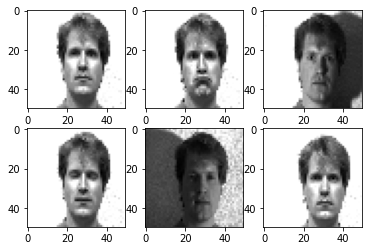

In [ ]:
display_images(train_images[0])

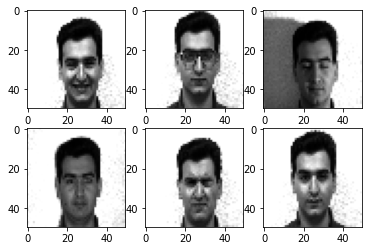

In [ ]:
display_images(train_images[14])

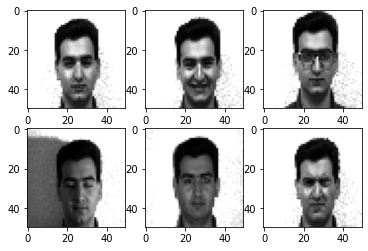

In [ ]:
display_images(grouped_imgs[14])

Computation of Eigen vectors


In [ ]:
def compute_PCA_ed(img_vectors):
 '''
 img_vectors of shape N*Total_pixels.
 Computes Eigen vectors using
 eigen decomposition method.
 Returns mean vector, covariance matrix and eigenvectors.
 '''
 #standardize data
 mean_image_vector = np.mean(img_vectors,axis=0)
 std_image_vector = np.std(img_vectors,axis=0)
 normls = []
 for imgv in img_vectors:
  normls.append((imgv-mean_image_vector)/std_image_vector)
 normls = np.array(normls)

 #covariance matrix
 ncovar = np.cov(np.transpose(normls))

 print("Computing eigenvectors")
 # Eigen vectors and values
 eig_vals, eig_vects = np.linalg.eig(ncovar)
 print("Eigenvectors calculated")

 return mean_image_vector,ncovar,np.real(np.transpose(eig_vects)),np.real(eig_vals)


In [ ]:
def plot_eigfaces(eig_vectors):
 plt.figure(figsize=(12,5))
 for i in range(1,11,1):
  plt.subplot(2,5,i)
  plt.title('eigenface {}'.format(i))
  plt.imshow(np.reshape(eig_vectors[i-1],(train_images.shape[-2],train_images.shape[-1])),cmap='gray')
 plt.show()

In [ ]:
all_train_imgs_vec = np.reshape(train_images,(-1,train_images.shape[-2]*train_images.shape[-1]))
mean_img,similar_covar,eig_vectors,eig_vals = compute_PCA_ed(all_train_imgs_vec)


Computing eigenvectors
Eigenvectors calculated


In [ ]:
#plt.imshow(cv2.resize(eig_vectors[0],(50,50)),cmap='gray')

**Fisherfaces**

In [ ]:
n_dim = np.array([2])
t = np.arange(5,101,5)
n_dim = np.append(n_dim,t)

In [ ]:
len(n_dim)

21

In [ ]:
pc_ls = []
pc_light_ls = []
pc_140 = eig_vectors[:140] # 140 eigen vectors.. each has 2500 elements
for i in range(len(n_dim)): #0 to 20..length=21
 pc_ls.append(eig_vectors[3:n_dim[i]+3,:]) #remove first 3 eigen vectors
 pc_light_ls.append(eig_vectors[:n_dim[i],:])#without removing first 3 eigen vectors

In [ ]:
eig_vectors[1,:]

array([0.02209129, 0.02178008, 0.02164029, ..., 0.0328408 , 0.03202352,
       0.02864055])

In [ ]:
def grp_proj(train_images,pc):
 grp_proj_imgs = []
 for i in range(len(train_images)):
  t1 = []
  for j in range(train_images.shape[1]):
    p = np.reshape(train_images[i][j],(train_images.shape[-2]*train_images.shape[-1]))
    t2 = []
    for k in range(len(pc)):
      proj = np.dot(p,pc[k])
      t2.append(proj)
    t1.append(t2)
  grp_proj_imgs.append(t1)
 del t1
 del t2
 grp_proj_imgs = np.array(grp_proj_imgs)
 return grp_proj_imgs

In [ ]:
def compute_btw_scatter(grp_imgs): #between class scatter matrix
 grp_s = grp_imgs.shape
 total_mean_image_vec = np.mean(np.reshape(grp_imgs,(1,-1,grp_s[-1])),axis=1)
 mean_images_vec = np.mean(grp_imgs,axis=1)
 s = np.zeros((grp_s[-1],grp_s[-1]))
 for i in range(len(mean_images_vec)):
  mu_d = np.transpose(np.reshape(mean_images_vec[i],(1,-1))-total_mean_image_vec)
  s = s + grp_s[1]*np.matmul(mu_d,np.transpose(mu_d))
 return s


In [ ]:
def compute_wtin_scatter(grp_imgs): #within class scatter matrix
 grp_s = grp_imgs.shape
 mean_images_vec = np.mean(grp_imgs,axis=1)
 s = np.zeros((grp_s[-1],grp_s[-1]))
 grp_imgs_vec = grp_imgs
 for i in range(len(mean_images_vec)):
  t = np.zeros((grp_s[-1],grp_s[-1]))
  for j in range(grp_s[1]):
    xmu_d = np.transpose(np.reshape(grp_imgs_vec[i][j]-mean_images_vec[i],(1,-1)))
    tp = np.matmul(xmu_d,np.transpose(xmu_d))
    t = t + np.matmul(xmu_d,np.transpose(xmu_d))
  s = s + t
 return s

In [ ]:
def fisherVecs(grp_proj_imgs): # fisher faces- eigen values and eigen vectors
 Sb = compute_btw_scatter(grp_proj_imgs)
 Sw = compute_wtin_scatter(grp_proj_imgs)
 Swinv = np.linalg.inv(Sw)
 fs = np.matmul(Swinv,Sb)
 Seig_vals, Seig_vects = np.linalg.eig(fs)
 Seig_vects = np.transpose(Seig_vects)
 return Seig_vects,Seig_vals

In [ ]:
def proj_on_fisher(grp_proj_imgs,Seig_vects): # project training images and obtain coefficients
 all_imgs_w = np.reshape(grp_proj_imgs,(-1,Seig_vects.shape[-1]))
 iw = []
 for i in range(len(all_imgs_w)):
  t = []
  for j in range(len(Seig_vects)):
    t.append(np.dot(Seig_vects[j],all_imgs_w[i]))
  iw.append(t)
 iw = np.array(iw)
 return iw

In [ ]:
def test_img_pca_proj(test_imgs,pc):
 test_imgs_vec = np.reshape(test_imgs,(-1,test_imgs.shape[-2]*test_imgs.shape[-1]))
 test_pca_coeffs = []
 for i in range(len(test_imgs_vec)):
  t = []
  for j in range(len(pc)):
   t.append(np.dot(pc[j],test_imgs_vec[i]))
  test_pca_coeffs.append(t)
 test_pca_coeffs = np.array(test_pca_coeffs)
 return test_pca_coeffs

In [ ]:
def test_img_fda_proj(test_pca_coeffs,Seig_vects):# project test image on fisher faces
 test_flda = []
 for i in range(len(test_pca_coeffs)):
  t = []
  for j in range(len(Seig_vects)):
   t.append(np.dot(Seig_vects[j],test_pca_coeffs[i]))
  test_flda.append(t)
 test_flda = np.array(test_flda)
 return test_flda

In [ ]:
def predictions(test_coeffs,train_coeffs):
 pred = []
 for i in range(len(test_coeffs)):
  d = []
  for j in range(len(train_coeffs)):
   d.append(np.sum(np.square(test_coeffs[i]-train_coeffs[j])))
  d = np.array(d)
  pred.append(np.argmin(d))
 return pred


In [ ]:
def accuracy(pred):
 acc = 0
 for i in range(len(pred)):
  if (pred[i]>=(i*10)) and (pred[i]<((i*10)+10)):
   acc = acc + 1
 acc = acc/len(pred)
 return acc

In [ ]:
pca_acc_ls = []
pca_light_acc_ls = []
fisher_acc_ls = []
# Fisher
grp_proj_imgs = grp_proj(train_images,pc_140)
Seig_vects,Seig_vals = fisherVecs(grp_proj_imgs)
print(Seig_vects.shape)
train_coeffs = proj_on_fisher(grp_proj_imgs,Seig_vects[:14])
test_pca_coeffs = test_img_pca_proj(test_imgs,pc_140)
test_coeffs = test_img_fda_proj(test_pca_coeffs,Seig_vects[:14])
pred_fisher = predictions(test_coeffs,train_coeffs)
acc_fisher = accuracy(pred_fisher)

(140, 140)


In [ ]:
acc_fisher

0.6

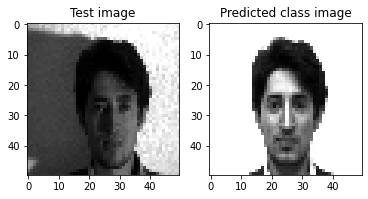

In [ ]:
plt.subplot(1,2,1)
plt.imshow(test_imgs[2],cmap='gray')
plt.title('Test image')
plt.subplot(1,2,2)
plt.imshow(np.reshape(all_train_imgs_vec[pred_fisher[2]],(50,50)),cmap='gray')
plt.title('Predicted class image')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
for i in range(1,11,1):
    plt.subplot(2,5,i)
    plt.imshow(np.reshape(np.real(np.matmul(np.reshape(Seig_vects[i-1],(1,-1)),pc_140)),(50,50)),cmap='gray')
    plt.title('Fisherface {}'.format(i))
plt.show()